In [1]:
%matplotlib inline
from subprocess import run
import os
from matplotlib import patches, collections
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation
from cartopy import crs, feature
import xarray as xr
import numpy as np

In [86]:
# Comparing the avaialble scrip files to mine
# ne30pg2
!cdo diffv ne30pg2_scrip_20200209.nc grid_dir/ne30pg2_scrip.nc

               Date     Time   Level Gridsize    Miss    Diff : S Z  Max_Absdiff Max_Reldiff : Parameter name
     1 : 0000-00-00 00:00:00       0    21600       0   12498 : F F   4.3368e-19  8.0502e-16 : grid_area  
     2 : 0000-00-00 00:00:00       0    21600       0   10617 : F F   1.1369e-13  1.3095e-15 : grid_center_lat
     3 : 0000-00-00 00:00:00       0    21600       0    7447 : F F   5.6843e-14  4.0314e-16 : grid_center_lon
     4 : 0000-00-00 00:00:00       0    86400       0   41004 : F T   1.7053e-13  1.9405e-15 : grid_corner_lat
     5 : 0000-00-00 00:00:00       0    86400       0   27296 : F T   5.6843e-14  4.1347e-16 : grid_corner_lon
  5 of 7 records differ
  0 of 7 records differ more than 0.001
cdo    diffn: Processed 518402 values from 14 variables over 2 timesteps [0.02s 15MB].


In [88]:
# ne4pg2
!cdo diffv ne4pg2_scrip_c20191218.nc grid_dir/ne4pg2_scrip.nc

               Date     Time   Level Gridsize    Miss    Diff : S Z  Max_Absdiff Max_Reldiff : Parameter name
     1 : 0000-00-00 00:00:00       0      384       0     317 : F F   4.1633e-17  1.3560e-15 : grid_area  
     2 : 0000-00-00 00:00:00       0      384       0     186 : F F   2.8422e-14  5.3135e-16 : grid_center_lat
     3 : 0000-00-00 00:00:00       0      384       0     162 : F F   8.5265e-14  3.9344e-16 : grid_center_lon
     4 : 0000-00-00 00:00:00       0     1536       0     752 : F T   1.4211e-14  4.8152e-16 : grid_corner_lat
     5 : 0000-00-00 00:00:00       0     1536       0     476 : F T   5.6843e-14  4.2012e-16 : grid_corner_lon
  5 of 7 records differ
  0 of 7 records differ more than 0.001
cdo    diffn: Processed 9218 values from 14 variables over 2 timesteps [0.04s 13MB].


In [89]:
# ne120pg2
!cdo diffv ne120pg2_scrip_c20191218.nc grid_dir/ne120pg2_scrip.nc

               Date     Time   Level Gridsize    Miss    Diff : S Z  Max_Absdiff Max_Reldiff : Parameter name
     1 : 0000-00-00 00:00:00       0   345600       0  343193 : F F   2.5004e-18  7.4942e-14 : grid_area  
     2 : 0000-00-00 00:00:00       0   345600       0  226356 : F F   1.8474e-13  5.9933e-15 : grid_center_lat
     3 : 0000-00-00 00:00:00       0   345600       0  151325 : F F   1.3500e-13  4.6447e-14 : grid_center_lon
     4 : 0000-00-00 00:00:00       0  1382400       0  891692 : F T   9.6634e-13  1.0782e-14 : grid_corner_lat
     5 : 0000-00-00 00:00:00       0  1382400       0  575292 : F T   1.7053e-13     0.99731 : grid_corner_lon
  5 of 7 records differ
  0 of 7 records differ more than 0.001
cdo    diffn: Processed 8294402 values from 14 variables over 2 timesteps [0.44s 37MB].


In [90]:
# northamericapg2
!cdo diffv northamericax4v1pg2_scrip.nc grid_dir/northamericax4v1pg2_scrip.nc

               Date     Time   Level Gridsize    Miss    Diff : S Z  Max_Absdiff Max_Reldiff : Parameter name
     1 : 0000-00-00 00:00:00       0    57816       0   55174 : F F   5.0958e-18  3.2394e-14 : grid_area  
     2 : 0000-00-00 00:00:00       0    57816       0   29452 : F F   6.1107e-13  6.8360e-15 : grid_center_lat
     3 : 0000-00-00 00:00:00       0    57816       0   21734 : F F   1.1369e-13  6.3100e-16 : grid_center_lon
     4 : 0000-00-00 00:00:00       0   231264       0  110499 : F F   1.3358e-12  1.4888e-14 : grid_corner_lat
     5 : 0000-00-00 00:00:00       0   231264       0   85177 : F T   1.1369e-13  1.8348e-13 : grid_corner_lon
  5 of 7 records differ
  0 of 7 records differ more than 0.001
cdo    diffn: Processed 1387586 values from 14 variables over 2 timesteps [0.15s 18MB].


In [9]:
# ne16pg2 scrip file is different with 5 grid_corners instead of 4. 
# Possibly since it comes from a pentagon file?
# What about the end product?
data_dir = '/mnt/d/Work/Codes/'
algo_list = ['fv2se_flx']
for algo in algo_list:
    run(f'ncremap --alg_typ={algo} --src_grd={data_dir}grid_dir/384x576_SCRIP.20220216.nc --dst_grd={data_dir}ne16pg2_scrip_c20191218.nc -m {data_dir}grid_dir/map_384x576_ne16pg2_pentagons_{algo}.nc'.split(' '), capture_output=True)
    run(f'ncremap --map={data_dir}grid_dir/map_384x576_ne16pg2_pentagons_{algo}.nc {data_dir}cmip6_mam4_bc_a4_surf_2010-2014_c181121.nc {data_dir}cmip6_mam4_bc_a4_surf_2010-2014_ne16pg2_pentagon_{algo}_c181121.nc'.split(' '), capture_output=True)
    run(f'ncremap --alg_typ={algo} --src_grd={data_dir}grid_dir/384x576_SCRIP.20220216.nc --dst_grd={data_dir}grid_dir/ne16pg2_scrip.nc -m {data_dir}grid_dir/map_384x576_ne16pg2_{algo}.nc'.split(' '), capture_output=True)
    run(f'ncremap --map={data_dir}grid_dir/map_384x576_ne16pg2_{algo}.nc {data_dir}cmip6_mam4_bc_a4_surf_2010-2014_c181121.nc {data_dir}cmip6_mam4_bc_a4_surf_2010-2014_ne16pg2_{algo}_c181121.nc'.split(' '), capture_output=True)

In [10]:
!cdo diffv cmip6_mam4_bc_a4_surf_2010-2014_ne16pg2_pentagon_fv2se_flx_c181121.nc cmip6_mam4_bc_a4_surf_2010-2014_ne16pg2_fv2se_flx_c181121.nc

Warning (find_time_vars): Time variable >time< not found!
Warning (find_time_vars): Time variable >time< not found!
               Date     Time   Level Gridsize    Miss    Diff : S Z  Max_Absdiff Max_Reldiff : Parameter name
     1 : 0000-00-00 00:00:00       0    55298       0       1 : F T       1.0000  6.2699e-08 : ALL        
     3 : 0000-00-00 00:00:00       0    55298       0       1 : F T       2.0000  7.5639e-08 : ALL        
     5 : 0000-00-00 00:00:00       0    55298       0       1 : F T       4.0000  6.9488e-08 : ALL        
     7 : 0000-00-00 00:00:00       0    55298       0       3 : F T       2.0000  6.8627e-08 : ALL        
    19 : 0000-00-00 00:00:00       0    55298       0       1 : F T       8.0000  1.0714e-07 : ALL        
    21 : 0000-00-00 00:00:00       0    55298       0       1 : F T       4.0000  1.1889e-07 : ALL        
    23 : 0000-00-00 00:00:00       0    55298       0       1 : F T      0.50000  7.6285e-08 : ALL        
    25 : 0000-00-00 00:00

Text(0.5, 1.0, 'ne16pg2_grid | algo = fv2se_flx\n global mean = 2.476766e+09, max = 2.50e+09, min = 0.00e+00')

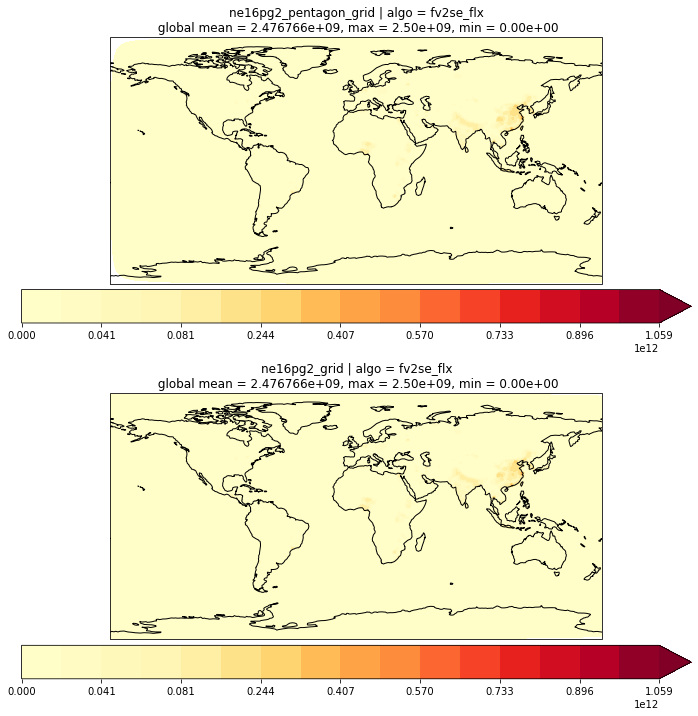

In [12]:
from cartopy.util import add_cyclic_point
from e3sm_map_plot import plot_field, get_area_weights, area_average, get_data
figure = plt.figure(figsize=(15, 12))

data_orig = xr.open_dataset(data_dir+'cmip6_mam4_bc_a4_surf_2010-2014_ne16pg2_pentagon_fv2se_flx_c181121.nc')
data=get_data(data_orig,'ALL')
wgts = get_area_weights(data_orig)
avg=area_average(data.mean(dim='time'),wgts).values
mx = data.mean(dim='time').mean().values
mn = data.mean(dim='time').min().values
axes = figure.add_subplot(211, projection=crs.PlateCarree())
plot_field(data_orig,'ALL')
plt.title('ne16pg2_pentagon_grid | algo = '+algo+'\n global mean = '+str(format(avg, '.6e')+', max = '+str(format(mx, '.2e'))+', min = '+str(format(mn, '.2e'))))

data_orig = xr.open_dataset(data_dir+'cmip6_mam4_bc_a4_surf_2010-2014_ne16pg2_fv2se_flx_c181121.nc')
data=get_data(data_orig,'ALL')
wgts = get_area_weights(data_orig)
avg=area_average(data.mean(dim='time'),wgts).values
mx = data.mean(dim='time').mean().values
mn = data.mean(dim='time').min().values
axes = figure.add_subplot(212, projection=crs.PlateCarree())
plot_field(data_orig,'ALL')
plt.title('ne16pg2_grid | algo = '+algo+'\n global mean = '+str(format(avg, '.6e')+', max = '+str(format(mx, '.2e'))+', min = '+str(format(mn, '.2e'))))